This notebook is for unsderstanding Linear Regression of statsmodels

Reference : 
https://www.statsmodels.org/stable/regression.html

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pylab as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load data to use
boston_data = datasets.load_boston()

# Prepare Data

In [3]:
# check features and target
print('X : ', boston_data.data.shape)
print('Y : ', boston_data.target.shape)

print('Feature names', boston_data.feature_names)

X :  (506, 13)
Y :  (506,)
Feature names ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# target
Y = pd.DataFrame(boston_data.target, columns=['target'])

In [6]:
# Correlation coefficient
Z = pd.concat([Y, X], axis=1)
Z.corr()

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
target,1.000000,-0.385832,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.385832,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,0.360445,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


# Modeling

In [7]:
# fit data to OLS(Ordinary Least Square)
X = sm.add_constant(X) # add constant term to features

# split training data and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

model = sm.OLS(Y_train, X_train)
result = model.fit()

# dispalay result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Sun, 10 Feb 2019   Prob (F-statistic):          6.22e-109
Time:                        15:22:42   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2889      5.678      5.335      0.000      19.126      41.452
CRIM          -0.1125      0.035     -3.250      0.001      -0.181      -0.044
ZN             0.0301      0.016      1.881      0.061      -0.001       0.062
INDUS          0.0407      0.067      0.605      0.546      -0.092       0.173
CHAS           2.7868      0.956      2.916      0.004       0.908       4.666
NOX          -17.2406      4.237     -4.069      0.000     -25.571      -8.911
RM             4.4325      0.464      9.551      0.000       3.520       5.345
AGE           -0.0062      0.015     -0.428      0.669      -0.035       0.022
DIS           -1.4485      0.226     -6.410      0.000      -1.893      -1.004
RAD            0.2621      0.076      3.451      0.001       0.113       0.411
TAX           -0.0106      0.004     -2.506      0.013      -0.019      -0.002
PTRATIO       -0.9164      0.144     -6.364      0.000      -1.200      -0.633
B              0.0125      0.003      4.203      0.000       0.007       0.018
LSTAT         -0.5093      0.056     -9.151      0.000      -0.619      -0.400
==============================================================================
Omnibus:                      133.030   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.504
Skew:                           1.379   Prob(JB):                    2.40e-126
Kurtosis:                       8.173   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# dispalay estimated params
result.params

const      30.288948
CRIM       -0.112463
ZN          0.030081
INDUS       0.040731
CHAS        2.786767
NOX       -17.240635
RM          4.432488
AGE        -0.006240
DIS        -1.448485
RAD         0.262114
TAX        -0.010639
PTRATIO    -0.916399
B           0.012452
LSTAT      -0.509349
dtype: float64

# Prediction

In [9]:
# predict
preds_train = result.predict(X_train) 
preds_val = result.predict(X_val)

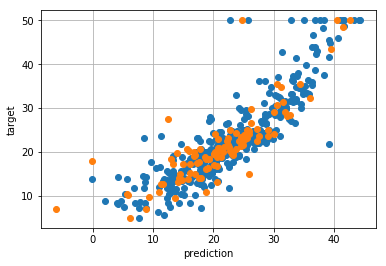

In [10]:
# visualize
plt.xlabel('prediction')
plt.ylabel('target')
plt.grid(True)

plt.plot(preds_train, Y_train, 'o')
plt.plot(preds_val, Y_val, 'o')

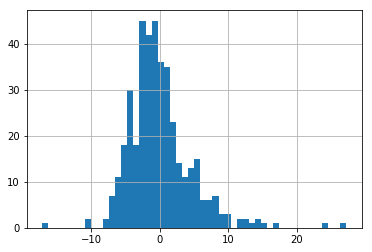

In [11]:
# histogram of residual
result.resid.hist(bins=50)

In [14]:
# VIF
# https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
vifs = [variance_inflation_factor(model.exog, i)for i in range(0, model.exog.shape[1])]
pd.DataFrame(vifs, index=model.exog_names, columns=["VIF value"])[1:]

,VIF value
CRIM,1.693529
ZN,2.465409
INDUS,3.877614
CHAS,1.096576
NOX,4.470809
RM,1.948486
AGE,2.990166
DIS,4.169339
RAD,7.653303
TAX,8.943203
